In [1]:
%matplotlib qt
import os
import pickle
from sdypy import EMA
import numpy as np
import matplotlib.pyplot as plt 
from EMA_functions import *
from DIC_functions import *
import pandas as pd
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as col
import ast
from scipy.ndimage import uniform_filter
from Feature_selecter import *
from pyidi import ROISelect
from matplotlib.path import Path

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
file_name_basis = 'Full_web_ecc2_new2_Floc18_v'
v_vec = [5]
file_name_vec = [file_name_basis + str(x) for x in v_vec]
file_name_vec_video = [x + '_S01.cihx' for x in file_name_vec]
df_filtered = df[df['filename'].isin(file_name_vec_video)]
df_filtered

test = '2D'
if test == '1D':
    # added_string = '_1d_and_2d_roi3x3'
    # added_string = '_1d_roi1x1'
    added_string = '_1d_roi3x3'
    # added_string = '_1d_roi3x3_test'
    # added_string = '_1d_roi3x3_temp'
    # added_string = '_1d_roi3x3_smoothing3x3'
    # added_string = '_1d_roi5x5'
    # added_string = '_1d_roi5x5_with_smoothing'
    # added_string = '_1d_roi5x3'
    # added_string = '_1d_and_2d_5000_points'
elif test == '2D':
    # added_string = '_1d_and_2d_5000_points'
    added_string = '_1d_and_2d_roi7x7'
    # added_string = '_1d_and_2d_roi9x9'

file_name = file_name_vec_video[0]
file_name_EMAs = os.path.splitext(file_name_vec[0])[0] + added_string
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/EMA structure'
prey_ij = ast.literal_eval(df_filtered['prey_ij'].item())
df_filtered

filename  \
123  Full_web_ecc2_new2_Floc18_v5_S01.cihx   

                                                  path  ecc  loc  mass  \
123  H:\My Drive\PHD\HSC\ecc2\web1\Full_web_ecc2_ne...    2   18  True   

    taut/loose impact/pluck  version  n_frames     fps  Oversatured pixels  \
123      Loose       Impact        5      8000  8000.0                 727   

     Undersatured pixels     prey_ij   spider_ij  
123                18127  (356, 234)  (553, 229)

In [3]:
with open(os.path.join(root, file_name_EMAs + '.pkl'), 'rb') as f:
    EMA_structure = pkl.load(f)
video = EMA_structure.open_video()
EMA_structure.open_impact_data()

H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v5_S01\Full_web_ecc2_new2_Floc18_v5_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 8000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


In [14]:
name_video =  'Full_web_ecc2_new2_Floc18_v5_S01.cihx'
root_video = 'H:/My Drive/PHD/HSC/ecc2/Web1/Full_web_ecc2_new2_Floc18_v5_S01'
file_path = os.path.join(root_video, name_video)
DIC_structure = DIC_Structure(file_path)

df = DIC_structure.list_test_data(max_d = 6, max_dd = 1, test_range = range(1,6))
df

Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test


cih_file  test_number  \
0  H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...            1   
1  H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...            2   
2  H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...            3   
3  H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...            4   
4  H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...            5   

               createdate method  roi_size  n_points  n_tracked_points  \
0  2024 04 11    18:24:26  lk_1D    [3, 3]      8500              8268   
1  2024 04 11    20:42:50  lk_1D    [3, 3]      8500              8254   
2  2024 04 11    22:15:19  lk_1D    [5, 5]      7300              7172   
3  2024 04 12    00:10:05  lk_1D    [5, 5]      7300              7163   
4  2024 04 12    11:05:22  lk_1D  [11, 11]      6000              5903   

   success_rate   dxy smoothing_size  
0      0.972706  None           None  
1      0.971059  None           None  
2      0.982466  None           None  
3      0.981233  None           None  
4      0.983833  None           None

Switch between 1D and 2D here!

In [5]:
if test == '1D':
    EMA_structure.tp = EMA_structure.maxima1d
    EMA_structure.d  = EMA_structure.displacements1D_1Dpoints
    td = EMA_structure.d +  EMA_structure.maxima1d.reshape(len(EMA_structure.maxima1d),1,2)
elif test == '2D':
    EMA_structure.tp = EMA_structure.maxima2d 
    EMA_structure.d  = EMA_structure.displacements2D_2Dpoints
    td = EMA_structure.d +  EMA_structure.maxima2d.reshape(len(EMA_structure.maxima2d),1,2)
# EMA_structure.tp, EMA_structure.d = DIC_structure.join_results([5])
# td = EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)

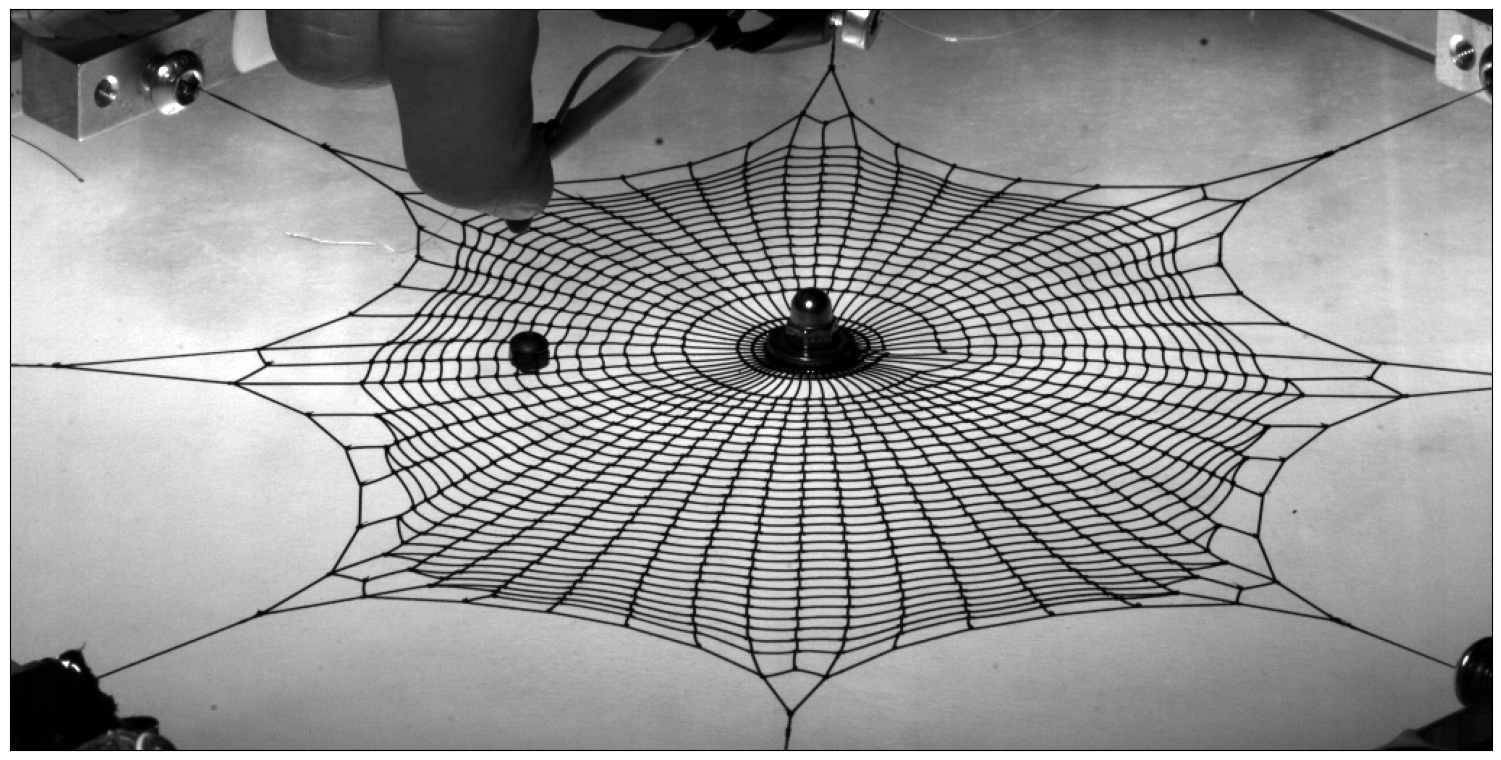

In [6]:
%matplotlib inline
peak_n = 4
sequential_image_n = 0
shift = 0
EMA_structure.nut_idx((prey_ij[0]-shift, prey_ij[1]+shift), exclude_high_amplitude = False, d_lim =25)
fig, ax = EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation = False, tp_nut = False, tp = True, valid_only=False)
# fig.savefig(os.path.join(EMA_structure.root_simulations, 'tracking dots', f'Mode_shapes_flat_{EMA_structure.file_name}'+added_string+'.png'), dpi=300, bbox_inches='tight')

In [19]:
%matplotlib qt
ani = EMA_structure.play_video(video, range(300,video.N-1), interval=100, points=td)

(-5.0, 5.0)

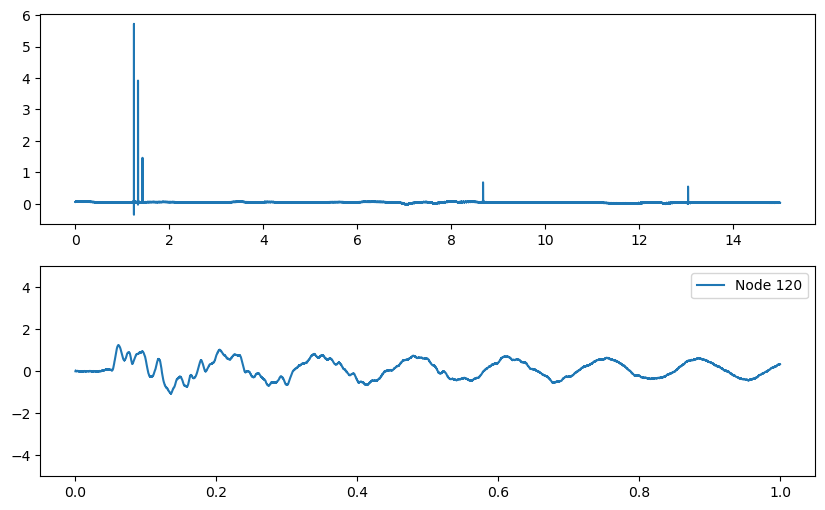

In [7]:
%matplotlib inline
EMA_structure.initialize_signals()
EMA_structure.initialize_displacement(idx='all', dir='y')
EMA_structure.t_camera_raw = EMA_structure.t_camera_raw
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(EMA_structure.t_force_raw, EMA_structure.force_raw)
EMA_structure.nearest_nut_index = 120
for node in [EMA_structure.nearest_nut_index]: # range(121,130):   #
    ax[1].plot(EMA_structure.t_camera_raw, EMA_structure.displacements_raw[node], label=f'Node {node}')
ax[1].legend()
ax[1].set_ylim(-5,5)


In [9]:
first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index], treshold=0.08, approximate_height = .5)
first_zero_id_force = EMA_structure.find_signal_start(EMA_structure.force_raw, peak_n=peak_n, treshold=0.05)
zeros_camera    = EMA_structure.greatest_common_divisor(EMA_structure.fs_camera, EMA_structure.fs_force)
zeros_force     = EMA_structure.n_samples_camera_to_force(zeros_camera)

# Shift and align signals
EMA_structure.t_camera = EMA_structure.shift_time(EMA_structure.t_camera_raw, EMA_structure.t_camera_raw[first_zero_id_cam-zeros_camera])
EMA_structure.t_force = EMA_structure.shift_time(EMA_structure.t_force_raw, EMA_structure.t_force_raw[first_zero_id_force-zeros_force])

# Clip signals
EMA_structure.t_camera          = EMA_structure.clip_signal_before(EMA_structure.t_camera,first_zero_id_cam-zeros_camera)
EMA_structure.displacements     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw, first_zero_id_cam-zeros_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_before(EMA_structure.t_force, first_zero_id_force-zeros_force)
EMA_structure.force             = EMA_structure.clip_signal_before(EMA_structure.force_raw, first_zero_id_force-zeros_force)

last_id_force, last_id_camera   = EMA_structure.find_last_common_time_ids(EMA_structure.t_camera, EMA_structure.t_force)
EMA_structure.t_camera          = EMA_structure.clip_signal_after(EMA_structure.t_camera, last_id_camera)
EMA_structure.displacements     = EMA_structure.clip_signal_after(EMA_structure.displacements, last_id_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_after(EMA_structure.t_force, last_id_force)
EMA_structure.force             = EMA_structure.clip_signal_after(EMA_structure.force, last_id_force)

# Zero Force after impact
EMA_structure.force = EMA_structure.zero_signal_treshold(EMA_structure.force, 0.1)

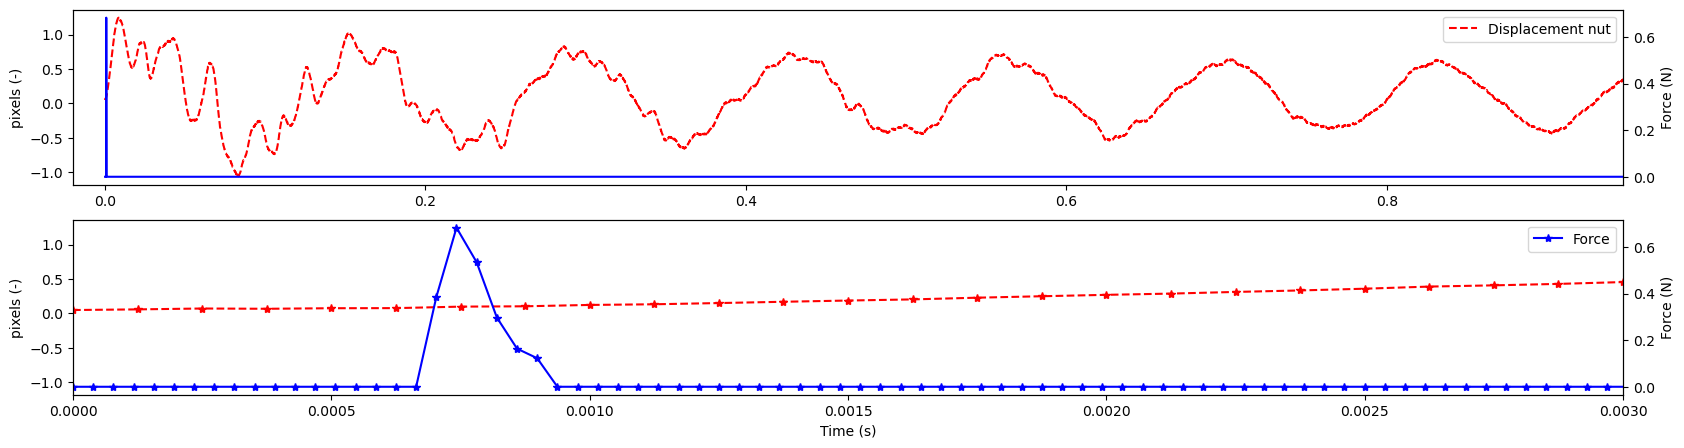

In [10]:
%matplotlib inline
fig, ax = plt.subplots(2,1,figsize=(20,5))
ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()
ax0_2.plot(EMA_structure.t_force, EMA_structure.force,'b-', label='Force (raw))')
ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut')
ax[0].set_xlim([-0.02, EMA_structure.t_camera[-1]])

ax[0].set_ylabel('pixels (-)')
ax0_2.set_ylabel('Force (N)')
ax[0].legend(loc='upper right')


ax1_2.plot(EMA_structure.t_force, EMA_structure.force,'b*-', label='Force')
ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut')
# ax[1].plot(t_camera2[disp_peaks], disp_nut[disp_peaks], 'rx')
ax[1].set_xlim([0, 0.003])
ax[1].set_ylabel('pixels (-)')
ax1_2.set_ylabel('Force (N)')

# set legend to north east
ax1_2.legend()
ax[1].set_xlabel('Time (s)')
plt.show()
fig.savefig(os.path.join(EMA_structure.root_simulations, 'signals', f'{EMA_structure.file_name} - example impact.png'), dpi=300, bbox_inches='tight')

In [11]:

# import numpy as np
# from matplotlib.path import Path
# roi_select = ROISelect(video)
# roi_select.polygon
# polygon_new = np.array(roi_select.polygon)
polygon_new = np.polygon = np.array([[  11,   39,   65,  107,   80,   54,   57,   63,  113,  153,  213,
         234,  245,  265,  289,  318,  359,  401,  445,  461,  426,  427,
         448,  482,  510,  509,  461,  429,  416,  416,  427,  464,  465,
         457,  413,  374,  319,  290,  272,  260,  254,  239,  227,  187,
         171,  150,  131,   98,   63,   53,   88,  102,  106,  120,  131,
         134,  137,  143,  142,  132,  116,  110,   87,   65,   13,   11],
       [ 572,  576,  591,  775,  923,  985, 1002, 1010,  924,  862,  903,
         954, 1023, 1023,  920,  887,  876,  906, 1001,  995,  872,  718,
         631,  564,  542,  533,  496,  399,  304,  238,  179,   72,   63,
          58,  162,  214,  215,  187,  145,   61,   16,   19,  165,  256,
         276,  275,  263,  206,  135,  142,  228,  268,  276,  283,  297,
         319,  332,  342,  358,  369,  372,  422,  507,  543,  562,  572]])
path = Path(polygon_new.T)

inside_polygon = path.contains_points(EMA_structure.tp)

np.sum(~inside_polygon)

74

In [12]:
polygon_new

array([[  49,  256,  468,  510,  471,  245,  232,  209,  189,  170,  150,
          49,   25,    1,   49],
       [1023, 1022, 1019,  536,    6,    1,  169,  230,  263,  277,  278,
          65,  102,  569, 1023]])

In [13]:
%matplotlib qt
# Feature filtering parameters for the 2D signals
# d_lim = 10
# z_limit = 0.2
# d_min = 0.9
# f_range = (3, 50)
# H_max_lim = 2e6
# H_peak_min = 2
# smooth_lim = 500
# max_drift = 1.

# Feature filtering parameters for the 1D signals
d_lim = 6
z_limit = 0.25
d_min = 0.7
f_range = (3, 50)
H_max_lim = 1e6
H_peak_min = 5
smooth_lim = 1.
max_drift = 2
max_end_drift = 1.5

EMA_structure.set_freq_properties(padding_ratio=1)
EMA_structure.get_transfer_function()
# EMA_structure.valid_tp(d_lim = 15, z_limit = 0.02, h_type = 'H1')
EMA_structure.valid_tp(d_lim = d_lim, z_limit = z_limit, h_type = 'H1', d_min=d_min, f_range= f_range)

smooth_signals = np.max(np.abs(np.diff(np.linalg.norm(EMA_structure.d, axis=2))), axis = 1) < smooth_lim
# non_drifting = np.abs(np.mean(np.linalg.norm(EMA_structure.d, axis=2), axis=1) < max_drift)
non_drifting = np.abs(np.mean(np.linalg.norm(EMA_structure.d[:,:-100], axis=2), axis=1) < max_drift)
non_drifting2 = np.abs(np.linalg.norm(EMA_structure.d[:,-1], axis=1)) < max_end_drift
H_max = np.max(np.abs(EMA_structure.H1), axis=1)
H_low = H_max<H_max_lim
H_peak_loc = np.argmax(np.abs(EMA_structure.H1), axis=1)
sd_points = H_peak_loc>H_peak_min

EMA_structure.valid_tps = EMA_structure.valid_tps  & smooth_signals & non_drifting & non_drifting2 & sd_points & inside_polygon#& H_low
# EMA_structure.valid_tps =  smooth_signals & H_low & non_drifting & EMA_structure.valid_tps & sd_points# & non_drifting & H_low &

print(np.sum(~EMA_structure.exclude_outliers))
print(f'Number of valid points is: {len(EMA_structure.tp[EMA_structure.valid_tps])}/{EMA_structure.tp.shape[0]}')
ani = EMA_structure.play_video(video, range(300,video.N - 1), interval=30, points=td[EMA_structure.valid_tps])

# plt.figure(figsize=(15, 5))
# plt.semilogy(EMA_structure.freq_force, np.abs(EMA_structure.force_fft), label='Force')
# plt.semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.disp_fft[EMA_structure.nearest_nut_index]), label='Displacement')

# plt.semilogy(freq_camera, np.abs(Disp[tp_id])/ np.abs(Force), label='output/input')
# plt.semilogy(freq_camera, np.abs(Disp[nearest_index]), label='Displacement nut')
# plt.plot(EMA_structure.freq_camera[], np.abs(EMA_structure.H1[EMA_structure.valid_tps[0]]), 'r', label='H1')
# for H1_i, peak_loc in zip(EMA_structure.H1[EMA_structure.valid_tps], H_peak_loc[EMA_structure.valid_tps]):
#     plt.semilogy(EMA_structure.freq_force, np.abs(H1_i), 'r', alpha=0.1, linewidth=0.2)
#     plt.semilogy(EMA_structure.freq_force[peak_loc], np.abs(H1_i[peak_loc]), 'ko', alpha=0.3)


# plt.xlim(f_range)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Force [N], Displacment [m] amplitude spectra')
# plt.legend()

# coh = np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps] / EMA_structure.H2[EMA_structure.valid_tps]), axis=0)
print(np.sum(~smooth_signals), np.sum(~non_drifting), np.sum(~non_drifting2), np.sum(~sd_points), np.sum(~H_low), np.sum(~EMA_structure.valid_tps))

# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# for disp_i in EMA_structure.d[EMA_structure.valid_tps, :, 0]:
#     ax.plot(EMA_structure.t_camera_raw, disp_i, 'r', alpha=0.2, linewidth=0.2)
# ax.plot(EMA_structure.t_camera, np.mean(EMA_structure.displacements[EMA_structure.valid_tps], axis=0), 'k', label='Mean displacement')

11
Number of valid points is: 1209/1600
219 176 178 334 30 391


In [28]:
%matplotlib qt
if test == '1D':
    roi_size = (11,11)
    Gi, Gj = np.gradient(EMA_structure.mean_image)
    s = np.array([1,0])
    Gs  = np.abs(s[0]*Gi + s[1]*Gj)
    filtered_image = uniform_filter(Gs, size=roi_size)
    score_list = filtered_image[EMA_structure.tp[:, 0], EMA_structure.tp[:, 1]]
elif test == '2D':
    roi_size = (7,7)
    feature_selecter = FeatureSelecter(EMA_structure.mean_image)
    feature_selecter.set_filter_method('eig0', roi_size)
    filtered_image = feature_selecter.apply_filter(downsample=1)
    score_list = filtered_image[EMA_structure.tp[:, 0], EMA_structure.tp[:, 1]]

fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
fig.set_tight_layout(True)
ax.imshow(EMA_structure.mean_image, cmap='gray')
ax.scatter(EMA_structure.tp[EMA_structure.valid_tps, 1], EMA_structure.tp[EMA_structure.valid_tps, 0], marker='o',s=10, c=score_list[EMA_structure.valid_tps], cmap='RdYlGn')
ax.scatter(EMA_structure.tp[~EMA_structure.valid_tps, 1], EMA_structure.tp[~EMA_structure.valid_tps, 0], marker='x',s=2, c=score_list[~EMA_structure.valid_tps], cmap='RdYlGn')
ax.set_xticks([])
ax.set_yticks([])

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_16588\4072050755.py:17: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  fig.set_tight_layout(True)


[]

In [ ]:
%matplotlib qt
# large_x_motion = np.max(EMA_structure.d[EMA_structure.valid_tps, :, 1], axis=1)>.5
ani = EMA_structure.play_video(video, range(300,video.N - 1), interval=30, points=td[EMA_structure.valid_tps])

In [ ]:
# smooth_signals2 = np.max(np.abs(np.diff(np.linalg.norm(EMA_structure.d, axis=2))), axis = 1) < 15
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# for disp_i in EMA_structure.d[~smooth_signals & smooth_signals2, :, 0]:
#     ax.plot(EMA_structure.t_camera_raw, disp_i, 'r', alpha=0.5, linewidth=0.5)
# ax.set_ylim([-7, 7])

In [15]:
# import sdynpy as sdpy
# frf_sampled = sdpy.TransferFunctionArray.from_time_data(
#     references_sampled,responses_sampled)
# pm = sdpy.PolyMax_GUI()


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [37]:
cam = EMA.Model(EMA_structure.H1[EMA_structure.valid_tps], EMA_structure.freq_camera, lower=5, upper=300, pol_order_high=230, frf_type = 'receptance')
cam.get_poles(show_progress=True)
# cam.Select_poles.chart_type = 1
cam.select_poles()


100%|█████████████████████████████████████████████████████████████| 230/230 [00:14<00:00, 16.35it/s]
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\sdypy\EMA\EMA.py:888: RuntimeWarning: divide by zero encountered in divide
  p1L = np.kron(np.array([1, 0]), -1/omega**2)
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\shape_base.py:1179: RuntimeWarning: invalid value encountered in multiply
  result = _nx.multiply(a_arr, b_arr, subok=(not is_any_mat))
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\sdypy\EMA\EMA.py:889: RuntimeWarning: divide by zero encountered in divide
  p2L = np.kron(np.array([0, 1]), -1/omega**2)


<Figure size 640x480 with 0 Axes>

In [41]:
cam.select_poles()

100%|█████████████████████████████████████████████████████████████| 230/230 [00:14<00:00, 16.07it/s]
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\sdypy\EMA\pole_picking.py:254: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\sdypy\EMA\pole_picking.py:194: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [38]:
if test == '1D':
    with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_1D_roi11x11_cam2.pkl'), 'wb') as f: #_1D_roi3x3_2_cam
        pkl.dump(cam, f)
elif test == '2D':
    # with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_2D_roi5x5_2_cam.pkl'), 'wb') as f:
    # with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_2D_roi7x7_cam.pkl'), 'wb') as f:
    with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_2D_roi9x9_2_cam.pkl'), 'wb') as f:
        pkl.dump(cam, f)

In [ ]:
# test = '1D'
if test == '1D':
    with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}' + added_string + '_cam.pkl'), 'rb') as f: #_3
        cam = pkl.load(f)
elif test == '2D':
    # with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_2D_roi5x5_2_cam.pkl'), 'rb') as f:
    with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_2D_roi7x7_cam.pkl'), 'rb') as f:
        cam = pkl.load(f)
added_string

In [ ]:
# cam.select_poles()

   Nat. f.      Damping
-----------------------
1)    7.4	0.0119
2)   11.0	0.0136
3)   18.4	0.0098
4)   25.9	0.0036
5)   27.8	0.0216
6)   34.8	0.0183
7)   36.7	0.0134
8)   39.0	0.0280
9)   42.0	0.0174
10)   44.5	0.0009
11)   47.0	0.0090
12)   49.8	0.0291
13)   53.5	0.0089
14)   57.7	0.0233
15)   60.7	0.0111
16)   63.8	0.0202
17)   65.9	0.0025
18)   69.1	0.0081
19)   75.2	0.0069
20)   77.7	0.0057
21)   81.8	0.0032
22)   86.8	0.0050
23)   94.2	0.0043
24)  101.5	0.0060
25)  104.3	0.0057
26)  106.0	0.0029
27)  113.2	0.0039
28)  119.3	0.0057
29)  123.0	0.0040
30)  124.5	0.0048
31)  126.0	0.0050
32)  130.9	0.0055
33)  137.1	0.0020
34)  139.4	0.0022
35)  141.5	0.0031
36)  145.7	0.0046
37)  148.8	0.0016
38)  150.6	0.0050
39)  156.5	0.0031
40)  160.4	0.0014
41)  161.5	0.0010
42)  163.5	0.0064
43)  167.0	0.0018
44)  169.5	0.0043
45)  177.8	0.0039
46)  178.5	0.0028
47)  187.7	0.0028
48)  190.6	0.0039
49)  196.9	0.0025
50)  201.7	0.0020
51)  210.7	0.0003
52)  214.0	0.0044
53)  217.7	-0.0002
54)  2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


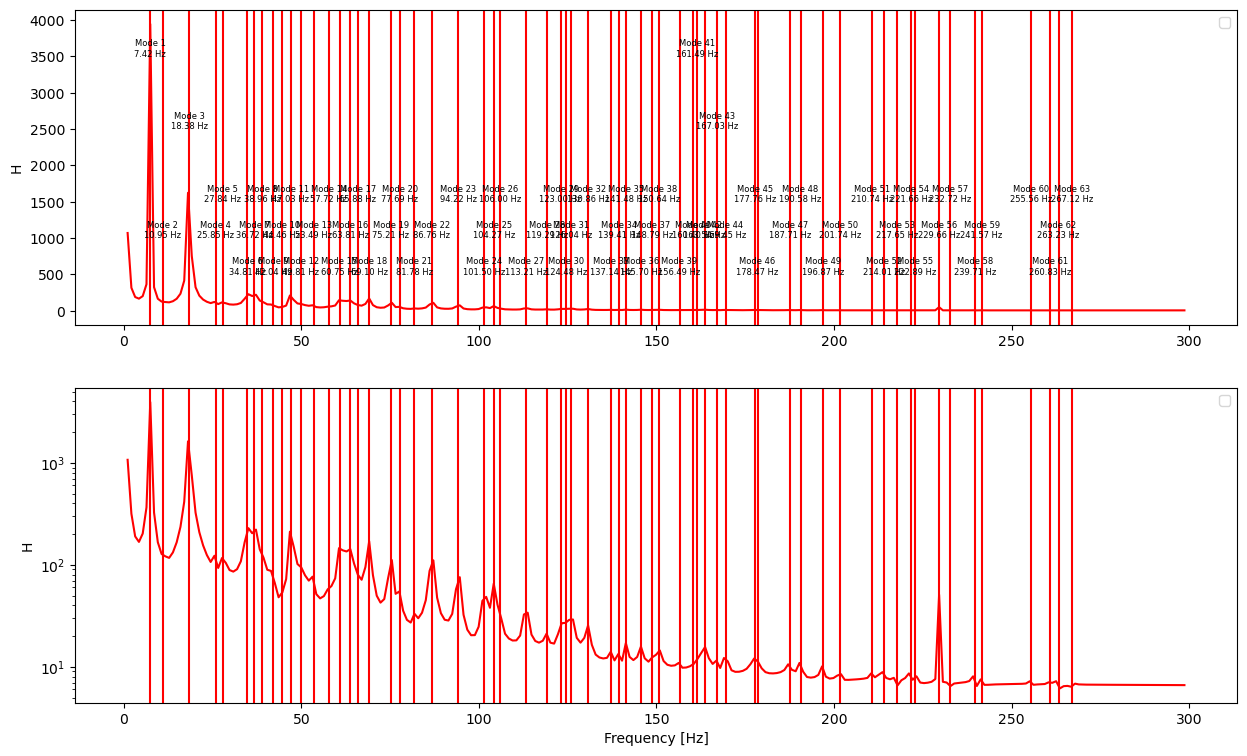

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\sdypy\EMA\tools.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  MAC[i, j] = MAC[i, j]/\


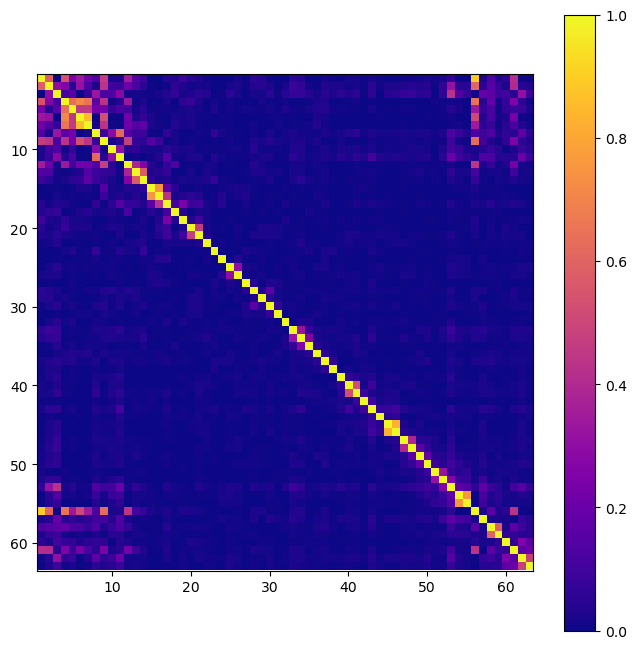

In [39]:
cam.print_modal_data()
fig, ax = plot_FRF(cam)
if test == '1D':
    fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_1D_roi3x3_3.png'))  #_2D_roi5x5_2
elif test == '2D':
    # fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_2D_roi7x7_2.png'))
    fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_2D_roi9x9_2.png'))
fig = plot_MAC(cam, n_modes = len(cam.nat_freq))
if test == '1D':
    fig[0].savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'MAC_{EMA_structure.file_name}_1D_roi3x3_3.png'))  #_2D_roi5x5_2
elif test == '2D':
    # fig.savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'MAC_{EMA_structure.file_name}_2D_roi7x7_2.png'))
    fig[0].savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'MAC_{EMA_structure.file_name}_2D_roi9x9_2.png'))

In [ ]:
# root_mode_shapes = os.path.join(EMA_structure.root_simulations, 'web mode shapes', EMA_structure.file_name + '_1D_roi3x3_2') #_1D_roi3x3

# if not os.path.exists(root_mode_shapes):
#     os.makedirs(root_mode_shapes)

# for mode_number in range(len(cam.nat_freq)): # range(14,n_modes): #  [22]: # 
#     print(f'mode_number: {mode_number}')
#     ani  = animate_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps]) #, indices_to_plot = indices_to_plot np.delete(tp_lim, biggest_outliers, axis=0)
#     writer = animation.FFMpegWriter(fps=60)
#     ani.save(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode_number}.mp4'), writer=writer)
    # plt.close()

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_10016\129943601.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic')


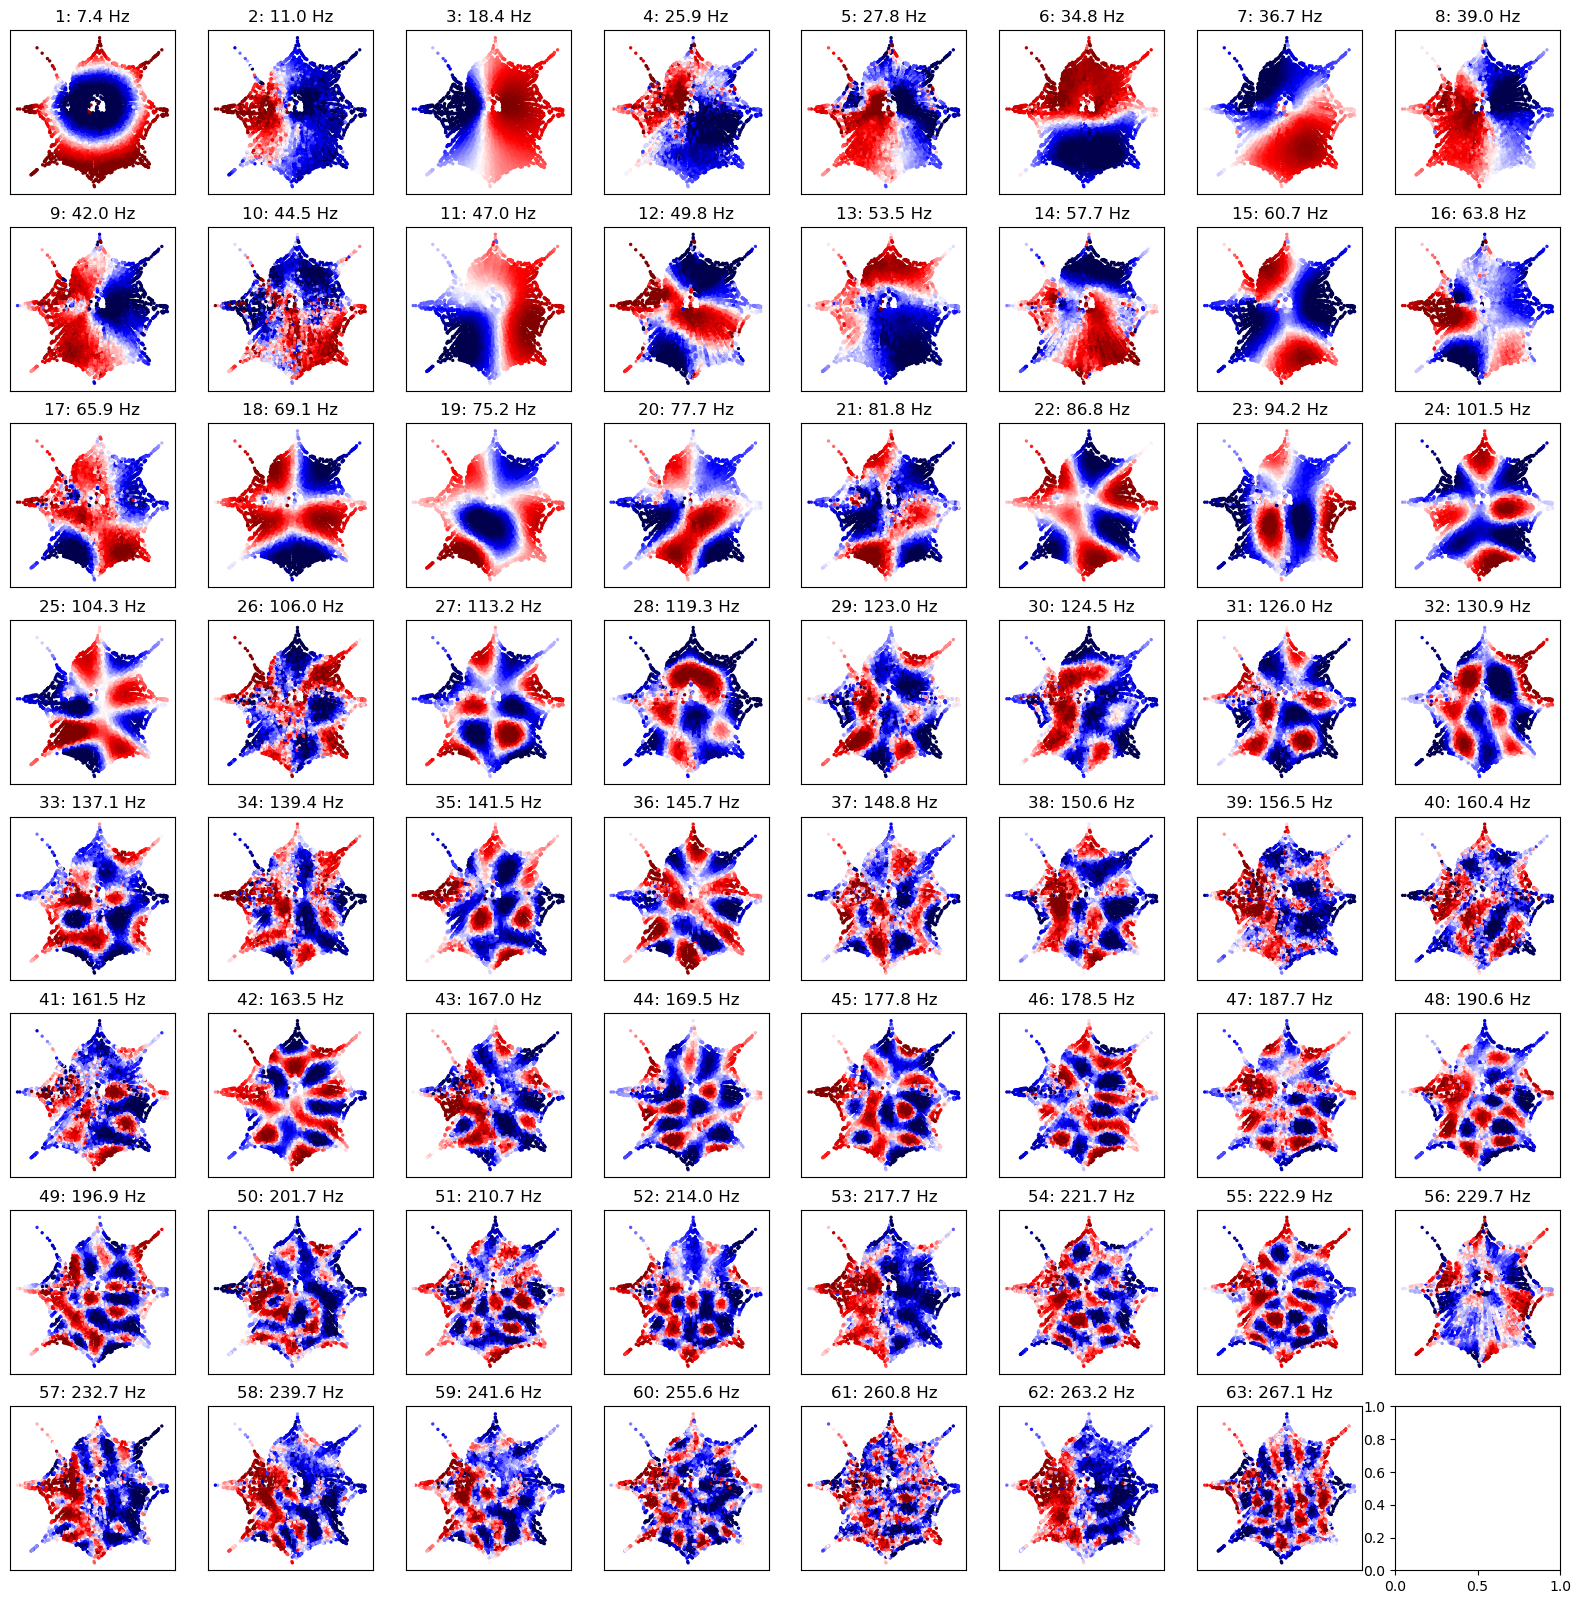

In [40]:
import numpy as np
%matplotlib inline
def plot_flat_mode_shape(cam, mode_number, tp, node, ax):
    A = cam.A
    A_imag = np.imag(A[:, mode_number])# / np.linalg.norm(A[:, mode_number])
    A_real = np.real(A[:, mode_number])# / np.linalg.norm(A[:, mode_number])

    A_abs = np.abs(A[:, mode_number])
    top_95_percentile_value = np.percentile(A_abs, 95)
    top_95_percentile_node = np.argmin(np.abs(A_abs - top_95_percentile_value))

    # node = np.argmax(np.abs(A[:, mode_number]))

    An_i = np.linalg.norm(A[top_95_percentile_node, mode_number])
    An_r = np.linalg.norm(A[top_95_percentile_node, mode_number])
    t_vec = np.linspace(0, 2 * np.pi, 100)
    A_max = 0
    t_max = 0
    for t in t_vec:
        A = An_i * np.sin(t) + An_r * np.cos(t)
        if A < A_max:
            A_max = A
            t_max = t

    Z = A_imag * np.sin(t_max) + A_real * np.cos(t_max)
    top_95_percentile = np.percentile(Z, 95)
    bot_5_percentile = np.percentile(Z, 5)
    v_max = top_95_percentile *1.11
    v_min = bot_5_percentile * 0.89
    if v_min>v_max:
        v_min = np.min(Z)
        v_max = np.max(Z)

    cmap = plt.cm.get_cmap('seismic')
    ax.scatter(tp[:, 1], -tp[:, 0], c=Z, cmap=cmap, s=2, vmax=v_max, vmin=v_min)
    return ax
fn_n = len(cam.nat_freq)
rows, columns  = (8,8)
fig, ax = plt.subplots(rows, columns, figsize=(20, 20))
for mode in range(fn_n): #[12]: #
    mode_i, mode_j = np.unravel_index(mode, (rows, columns))
    ax[mode_i, mode_j] = plot_flat_mode_shape(cam, mode, EMA_structure.tp[EMA_structure.valid_tps], EMA_structure.nearest_nut_index+1, ax[mode_i, mode_j])
    # ax[mode_i, mode_j].set_aspect('equal')
    ax[mode_i, mode_j].set_xticks([])
    ax[mode_i, mode_j].set_yticks([])
    ax[mode_i, mode_j].set_title(f'{mode+1}: {cam.nat_freq[mode]:.1f} Hz')

fig.savefig(os.path.join(EMA_structure.root_simulations, 'web mode shapes flat', f'Mode_shapes_flat_{EMA_structure.file_name}_{test}_roi{roi_size}.png'), dpi=300, bbox_inches='tight')